In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os
import sys
from glob import glob

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten
from tensorflow.keras.optimizers import SGD, Adam

from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator



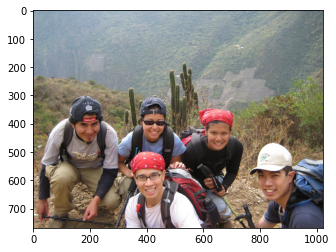

In [10]:
plt.imshow(image.load_img(r"D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\Food-5K\training\0_1.jpg"))
plt.show()

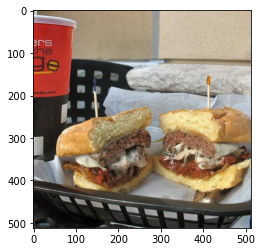

In [11]:
plt.imshow(image.load_img(r"D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\Food-5K\training\1_1.jpg"))
plt.show()

In [12]:
os.mkdir("FoodData")

In [14]:
!dir

 Volume in drive D is Storage space
 Volume Serial Number is 54A5-699F

 Directory of D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2

11-05-2021  01:36    <DIR>          .
11-05-2021  01:36    <DIR>          ..
11-05-2021  01:09    <DIR>          .ipynb_checkpoints
15-04-2021  18:43            59,832 001. Classification Introduction.ipynb
14-04-2021  16:26            14,983 002. Regression Introduction.ipynb
22-04-2021  23:08            90,761 003. CNN - Fashion MNIST.ipynb
22-04-2021  23:59            80,993 004. CNN - CIFAR 10.ipynb
24-04-2021  03:13           116,482 005. Autoregressive Time Series Prediction via ANN.ipynb
24-04-2021  17:51            99,981 006. Simple RNN for Time Series.ipynb
26-04-2021  01:56         1,257,435 007. Difficult Sequences with LSTMs & GRUs.ipynb
30-04-2021  01:55           305,820 008. Stock Prices predictions using LSTM.ipynb
30-04-2021  03:46             4,524 009. Text preprocessing.ipynb
30-04-2021  18:10            76,791 010. Spam Classif

In [16]:
!mkdir FoodData\train
!mkdir FoodData\test

!mkdir FoodData\train\nonFood
!mkdir FoodData\train\Food

!mkdir FoodData\test\nonFood
!mkdir FoodData\test\Food





In [19]:
!move training\0*.jpg FoodData\train\nonFood
!move training\1*.jpg FoodData\train\Food

!move validation\0*.jpg FoodData\test\nonFood
!move validation\1*.jpg FoodData\test\Food

D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\0_0.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\0_1.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\0_10.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\0_100.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\0_1000.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\0_1001.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\0_1002.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\0_1003.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\0_1004.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\0_1005.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\0_1006.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\0_1007.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\0_1008.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\0_1009.jpg
D

D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\0_1112.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\0_1113.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\0_1114.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\0_1115.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\0_1116.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\0_1117.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\0_1118.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\0_1119.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\0_112.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\0_1120.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\0_1121.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\0_1122.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\0_1123.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\0_11

D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\1_0.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\1_1.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\1_10.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\1_100.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\1_1000.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\1_1001.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\1_1002.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\1_1003.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\1_1004.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\1_1005.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\1_1006.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\1_1007.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\1_1008.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\training\1_1009.jpg
D

D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\0_135.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\0_136.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\0_137.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\0_138.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\0_139.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\0_14.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\0_140.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\0_141.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\0_142.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\0_143.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\0_144.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\0_145.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\0_146.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\

D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\0_270.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\0_271.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\0_272.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\0_273.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\0_274.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\0_275.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\0_276.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\0_277.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\0_278.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\0_279.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\0_28.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\0_280.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\0_281.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\

D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\1_0.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\1_1.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\1_10.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\1_100.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\1_101.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\1_102.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\1_103.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\1_104.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\1_105.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\1_106.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\1_107.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\1_108.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\1_109.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\vali

D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\1_280.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\1_281.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\1_282.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\1_283.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\1_284.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\1_285.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\1_286.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\1_287.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\1_288.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\1_289.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\1_29.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\1_290.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\validation\1_291.jpg
D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\

In [2]:
train_path = r"D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\FoodData\train"
valid_path = r"D:\OWN_CODES\003. Deep Learning\001. Lazy Prog TF 2\FoodData\test"

In [3]:
IMAGE_SIZE = [200,200]

In [4]:
image_files = glob(train_path + '/*/*.jpg')
valid_image_files = glob(valid_path + '/*/*.jpg')

In [5]:
image_files

['D:\\OWN_CODES\\003. Deep Learning\\001. Lazy Prog TF 2\\FoodData\\train\\Food\\1_0.jpg',
 'D:\\OWN_CODES\\003. Deep Learning\\001. Lazy Prog TF 2\\FoodData\\train\\Food\\1_1.jpg',
 'D:\\OWN_CODES\\003. Deep Learning\\001. Lazy Prog TF 2\\FoodData\\train\\Food\\1_10.jpg',
 'D:\\OWN_CODES\\003. Deep Learning\\001. Lazy Prog TF 2\\FoodData\\train\\Food\\1_100.jpg',
 'D:\\OWN_CODES\\003. Deep Learning\\001. Lazy Prog TF 2\\FoodData\\train\\Food\\1_1000.jpg',
 'D:\\OWN_CODES\\003. Deep Learning\\001. Lazy Prog TF 2\\FoodData\\train\\Food\\1_1001.jpg',
 'D:\\OWN_CODES\\003. Deep Learning\\001. Lazy Prog TF 2\\FoodData\\train\\Food\\1_1002.jpg',
 'D:\\OWN_CODES\\003. Deep Learning\\001. Lazy Prog TF 2\\FoodData\\train\\Food\\1_1003.jpg',
 'D:\\OWN_CODES\\003. Deep Learning\\001. Lazy Prog TF 2\\FoodData\\train\\Food\\1_1004.jpg',
 'D:\\OWN_CODES\\003. Deep Learning\\001. Lazy Prog TF 2\\FoodData\\train\\Food\\1_1005.jpg',
 'D:\\OWN_CODES\\003. Deep Learning\\001. Lazy Prog TF 2\\FoodData\\t

In [6]:
folders = glob(train_path + '/*')

In [7]:
folders

['D:\\OWN_CODES\\003. Deep Learning\\001. Lazy Prog TF 2\\FoodData\\train\\Food',
 'D:\\OWN_CODES\\003. Deep Learning\\001. Lazy Prog TF 2\\FoodData\\train\\nonFood']

In [8]:
ptm = PretrainedModel(
        input_shape = IMAGE_SIZE + [3],
        weights = 'imagenet',
        include_top = False

)

In [9]:
ptm.trainable = False

In [10]:
K = len(folders)

x = Flatten()(ptm.output)
x = Dense(K, activation = 'softmax')(x)

In [11]:
model = Model(inputs = ptm.input , outputs = x)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [13]:
gen = ImageDataGenerator(
        rotation_range = 20,
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        shear_range = 0.1,
        zoom_range = 0.2,
        horizontal_flip = True,
        preprocessing_function = preprocess_input


)

In [14]:
batch_size = 128


In [15]:
train_generator = gen.flow_from_directory(
            
    train_path,
    shuffle = True,
    target_size = IMAGE_SIZE,
    batch_size = batch_size
    )

valid_generator = gen.flow_from_directory(
    
    valid_path,
    target_size = IMAGE_SIZE,
    batch_size = batch_size
)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [17]:
r = model.fit(
        train_generator,
        validation_data = valid_generator,
        epochs = 1,
        steps_per_epoch = int(np.ceil(len(image_files)/batch_size)),
        validation_steps = int(np.ceil(len(valid_image_files)/batch_size))
)

24/24 [==============================] - 579s 24s/step - loss: 1.4719 - accuracy: 0.9270 - val_loss: 0.8672 - val_accuracy: 0.9640


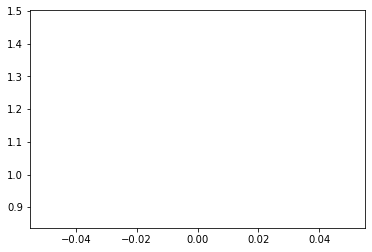

In [19]:
plt.plot(r.history['loss'] , color = 'red' , label = 'loss')
plt.plot(r.history['val_loss'] , color = 'blue' , label = 'val_loss')


In [20]:
r.history['loss']

[1.4718726873397827]

In [21]:
model.save("Food_5k_epoch1.h5")